In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import random
import math

from numpy import mean, std
from scipy import stats
import scipy as sp
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import get_scorer, make_scorer, confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, fbeta_score, roc_curve, roc_auc_score, f1_score, confusion_matrix, mean_squared_error, log_loss
from sklearn import svm, datasets
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.exceptions import ConvergenceWarning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA

from warnings import simplefilter
import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.base import clone
from sklearn.preprocessing import FunctionTransformer

simplefilter("ignore", category = ConvergenceWarning)

In [2]:
path = "/Users/yaeerk/Documents/NAYA/classification/"
jobs = 8

In [3]:
df = pd.read_csv(path + 'PROTECT_and_RISK_shared_DEGs_NOT NORM.csv', index_col = 0)
X = df.drop('Diagnosis', axis = 1)
y = df.Diagnosis
y = LabelEncoder().fit_transform(y)
numerical_cols = X.columns.to_list()

In [4]:
results = pd.read_csv(path + "classification-results-3-pca.csv")
results.tail()

,Unnamed: 0,score,test score,train score,test variance,train variance,test rmse,train rmse,test log_loss,train log_loss,test size,random state,estimator,estimator params
2683,2683,accuracy,0.968831,0.973963,0.000715,0.000029,0.124035,0.161374,0.531366,0.899447,0.2,2050,Smote/pca/SVC,"rbf,1,25"
2684,2684,f1,0.971938,0.998041,0.000443,0.000003,0.124035,0.051031,0.531378,0.089945,0.2,2050,Smote/pca/SVC,"linear,1,50"
2685,2685,accuracy,0.971429,0.998048,0.000499,0.000003,0.124035,0.051031,0.531378,0.089945,0.2,2050,Smote/pca/SVC,"linear,1,50"
2686,2686,f1,0.967062,0.978693,0.000872,0.000039,0.124035,0.144338,0.531366,0.719558,0.2,2050,Smote/pca/SVC,"rbf,1,100"
2687,2687,accuracy,0.968831,0.979170,0.000715,0.000036,0.124035,0.144338,0.531366,0.719558,0.2,2050,Smote/pca/SVC,"rbf,1,100"


In [5]:
results.estimator.unique()

array(['Smote/pca/RandomForestClassifier', 'Smote/pca/AdaBoostRegressor',
       'Smote/pca/LogisticRegression', 'Smote/pca/SVC'], dtype=object)

In [6]:
f1       = results[results.score == "f1"]
accuracy = results[results.score == "accuracy"]

<AxesSubplot:xlabel='test score', ylabel='test log_loss'>

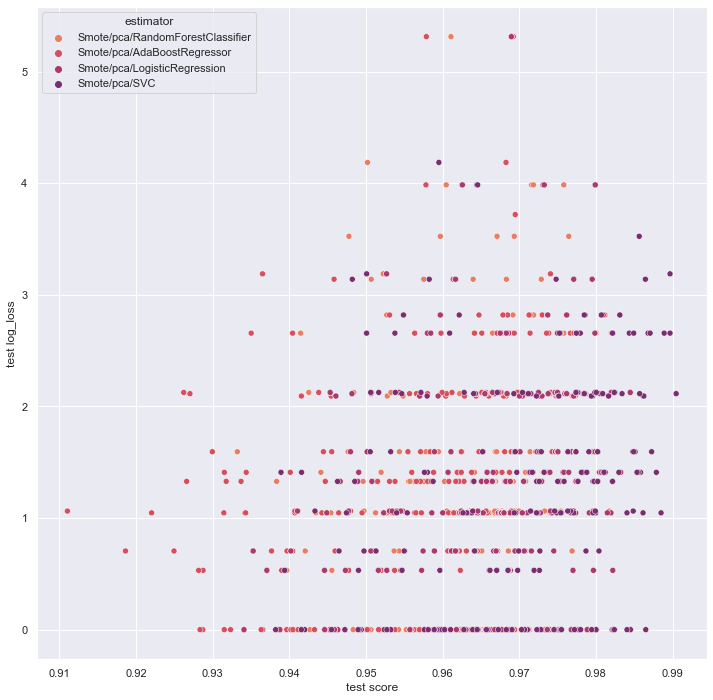

In [7]:
sns.set(rc = {"figure.figsize" : (12, 12)}) 
sns.scatterplot(data = f1, x = "test score", y = "test log_loss", hue = "estimator", palette = "flare")

<AxesSubplot:xlabel='test score', ylabel='random state'>

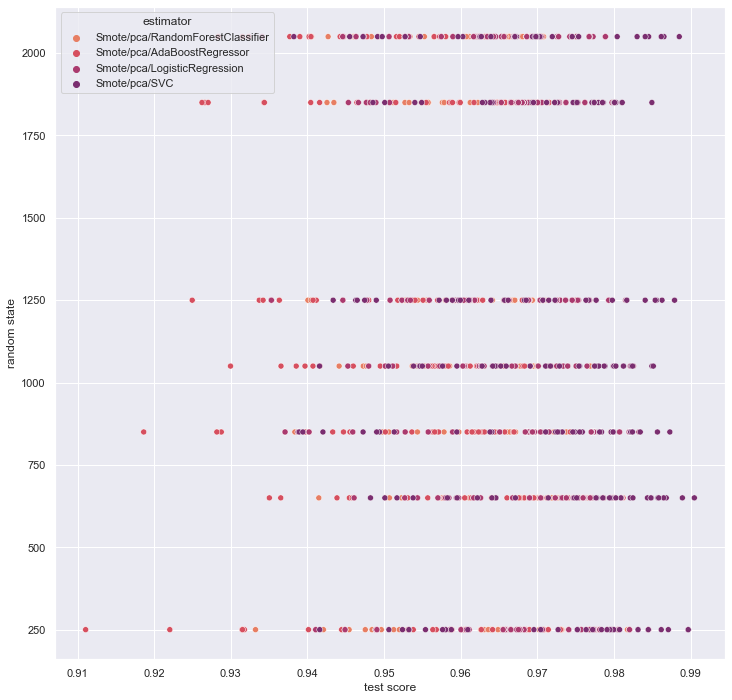

In [8]:
sns.set(rc = {"figure.figsize" : (12, 12)}) 
sns.scatterplot(data = f1, x = "test score", y = "random state", hue = "estimator", palette = "flare")

<AxesSubplot:xlabel='test score', ylabel='test size'>

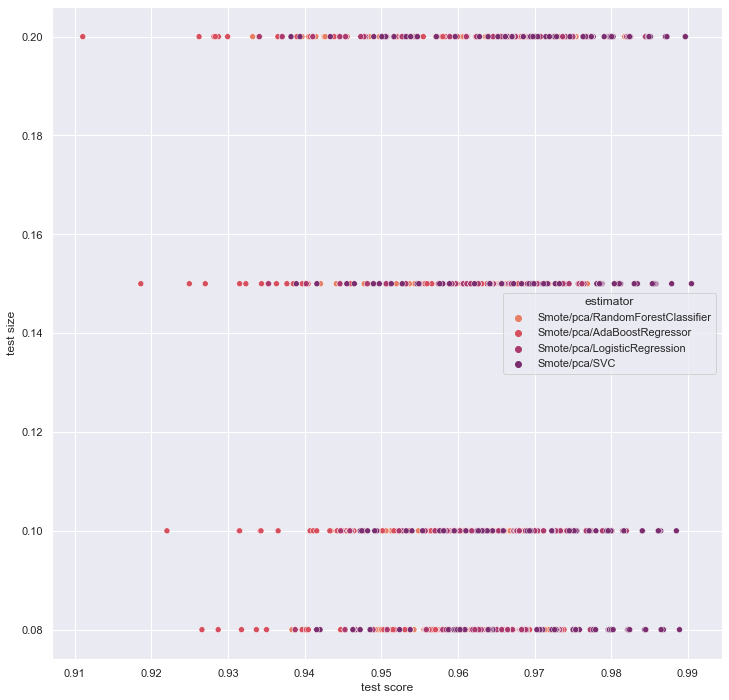

In [9]:
sns.set(rc = {"figure.figsize" : (12, 12)}) 
sns.scatterplot(data = f1, x = "test score", y = "test size", hue = "estimator", palette = "flare")

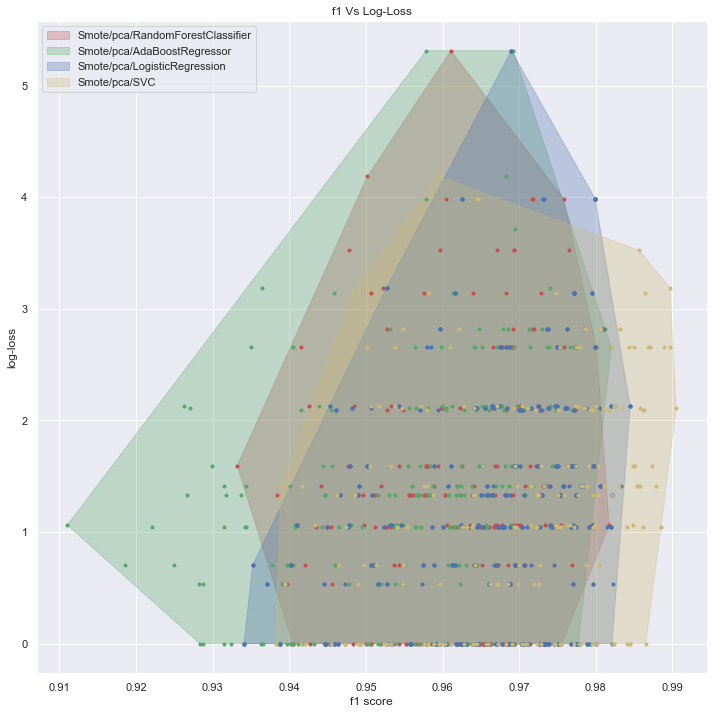

In [10]:
#overall scores
colors = ['r', 'g', 'b', 'y']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for k, estimator in enumerate(f1.estimator.unique()):
    data = f1[f1.estimator == estimator]    
    x = data["test score"].to_list()
    z = data["test log_loss"].to_list()
    points = np.transpose(np.array([x, z]))
    hull = ConvexHull(points)
    
    plt.plot(points[:,0], points[:,1], '.', color = colors[k])
    plt.fill(points[hull.vertices,0], points[hull.vertices, 1], color = colors[k], alpha = 0.3, label = estimator)

plt.title('f1 Vs Log-Loss')
plt.xlabel('f1 score')
plt.ylabel('log-loss')
plt.legend(loc = 2)
plt.show()

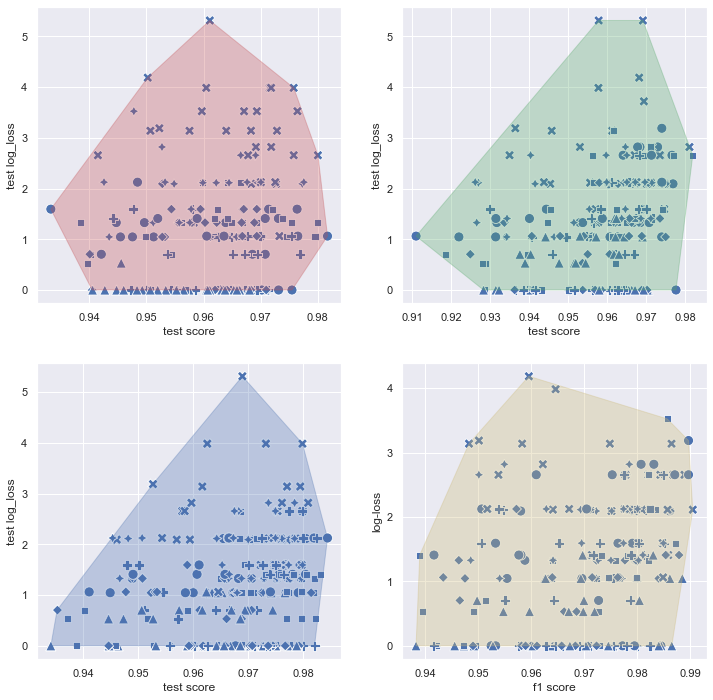

In [11]:
#how random state changes distribution
colors = ['r', 'g', 'b', 'y']
fig, axs = plt.subplots(2, 2)

for k, estimator in enumerate(f1.estimator.unique()):
    
    ax = axs[ k // 2, k % 2]
    data = f1[f1.estimator == estimator]    
    x = data["test score"].to_list()
    z = data["test log_loss"].to_list()
    
    sns.scatterplot(data = data, x = "test score", y = "test log_loss", s = 100, style = "random state", ax = ax)

    points = np.transpose(np.array([x, z]))
    hull = ConvexHull(points)
    ax.fill(points[hull.vertices,0], points[hull.vertices, 1], color = colors[k], alpha = 0.3)  
    ax.get_legend().remove()

#plt.title('f1 Vs Log-Loss')
plt.xlabel('f1 score')
plt.ylabel('log-loss')
#plt.legend(loc = 2)
plt.show()

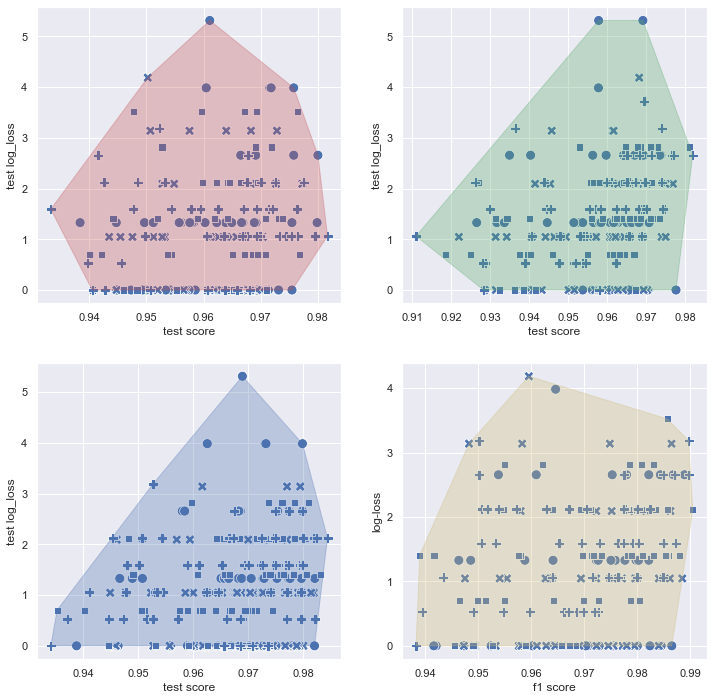

In [12]:
#how test size changes distribution
colors = ['r', 'g', 'b', 'y']
fig, axs = plt.subplots(2, 2)

for k, estimator in enumerate(f1.estimator.unique()):
    
    ax = axs[ k // 2, k % 2]
    data = f1[f1.estimator == estimator]    
    x = data["test score"].to_list()
    z = data["test log_loss"].to_list()
    
    sns.scatterplot(data = data, x = "test score", y = "test log_loss", s = 100, style = "test size", ax = ax)

    points = np.transpose(np.array([x, z]))
    hull = ConvexHull(points)
    ax.fill(points[hull.vertices,0], points[hull.vertices, 1], color = colors[k], alpha = 0.3)  
    ax.get_legend().remove()

#plt.title('f1 Vs Log-Loss')
plt.xlabel('f1 score')
plt.ylabel('log-loss')
#plt.legend(loc = 2)
plt.show()

In [13]:
m = f1[f1["test score"] == max(f1["test score"])]
m

,Unnamed: 0,score,test score,train score,test variance,train variance,test rmse,train rmse,test log_loss,train log_loss,test size,random state,estimator,estimator params
2492,2492,f1,0.990476,0.99824,0.000136,0.000006,0.247436,0.048337,2.114652,0.080698,0.15,650,Smote/pca/SVC,"linear,1,50"
